In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# TeamPJ - PUBG Finish Placement Prediction (Kernels Only)

#### 2022 Jun 07 
- 6/7 To do
- Obj columns만 날리고, 러프하게 돌려보기
- obj + drop 한 col  날리고, 러프하게 돌려보기

In [ ]:
#Basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# For google colab memory issue
pd.set_option('mode.chained_assignment',  None)

In [ ]:
# Memory saving function credit to https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    print('{')
    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        
        col_type = str(df[col].dtype)
        if col_type == 'object':
            col_type = 'str'
        else:
            col_type = 'np.' + col_type    
        #print('\'' + col + '\':' + col_type + ',')
    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    print('}')
    return df

In [ ]:
def import_data(file):
    """create a dataframe and optimize its memory usage"""
    df = pd.read_csv(file, parse_dates=True, keep_date_col=True)
    df = reduce_mem_usage(df)
    return df

In [ ]:
# Jupyter notebook
# pubg = pd.read_csv('./data/train_V2.csv') #normal
# train = import_data('./data/train_V2.csv')
# test = import_data('./data/test_V2.csv')
# pubg.head()

# Google Colab
print('PUBG train')
train = import_data('/content/drive/MyDrive/modlingPJ/train_V2.csv')
print('PUBG test')
test = import_data('/content/drive/MyDrive/modlingPJ/test_V2.csv')

PUBG train
Memory usage of dataframe is 983.90 MB
{
Memory usage after optimization is: 288.39 MB
Decreased by 70.7%
}
PUBG test
Memory usage of dataframe is 413.18 MB
{
Memory usage after optimization is: 121.74 MB
Decreased by 70.5%
}


In [ ]:
pd.set_option('display.max_columns', 30)
train.head(2)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.0,0,0,0,60,1241,0,0,0.0,1306,squad-fpp,28,26,-1,0,0.000000,0,0.000000,0,0,244.75,1,1466,0.444336
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.5,0,0,0,57,0,0,0,0.0,1777,squad-fpp,26,25,1484,0,0.004501,0,11.039062,0,0,1434.00,5,0,0.640137


In [ ]:
#pubg = pd.read_csv('/content/drive/MyDrive/modlingPJ/train_V2.csv')
pubg = train.copy()
pubg.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00000,0,0,0,60,1241,0,0,0.00000,1306,squad-fpp,28,26,-1,0,0.000000,0,0.000000,0,0,244.75,1,1466,0.444336
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.50000,0,0,0,57,0,0,0,0.00000,1777,squad-fpp,26,25,1484,0,0.004501,0,11.039062,0,0,1434.00,5,0,0.640137
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00000,0,0,0,47,0,0,0,0.00000,1318,duo,50,47,1491,0,0.000000,0,0.000000,0,0,161.75,2,0,0.775391
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90625,0,0,0,75,0,0,0,0.00000,1436,squad-fpp,31,30,1408,0,0.000000,0,0.000000,0,0,202.75,3,0,0.166748
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00000,0,0,0,45,0,1,1,58.53125,1424,solo-fpp,97,95,1560,0,0.000000,0,0.000000,0,0,49.75,2,0,0.187500


In [ ]:
# information of df
pubg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int8   
 4   boosts           int8   
 5   damageDealt      float16
 6   DBNOs            int8   
 7   headshotKills    int8   
 8   heals            int8   
 9   killPlace        int8   
 10  killPoints       int16  
 11  kills            int8   
 12  killStreaks      int8   
 13  longestKill      float16
 14  matchDuration    int16  
 15  matchType        object 
 16  maxPlace         int8   
 17  numGroups        int8   
 18  rankPoints       int16  
 19  revives          int8   
 20  rideDistance     float16
 21  roadKills        int8   
 22  swimDistance     float16
 23  teamKills        int8   
 24  vehicleDestroys  int8   
 25  walkDistance     float16
 26  weaponsAcquired  int16  
 27  winPoints   

#### Data fields

- DBNOs - Number of enemy players knocked.
- assists - Number of enemy players this player damaged that were killed by teammates.
- boosts - Number of boost items used.
- damageDealt - Total damage dealt. Note: Self inflicted damage is subtracted.
- headshotKills - Number of enemy players killed with headshots.
- heals - Number of healing items used.
- Id - Player’s Id
- killPlace - Ranking in match of number of enemy players killed.
- killPoints - Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.
- killStreaks - Max number of enemy players killed in a short amount of time.
- kills - Number of enemy players killed.
- longestKill - Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.
- matchDuration - Duration of match in seconds.
- matchId - ID to identify match. There are no matches that are in both the training and testing set.
- matchType - String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.
- rankPoints - Elo-like ranking of player. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes place of “None”.
- revives - Number of times this player revived teammates.
- rideDistance - Total distance traveled in vehicles measured in meters.
- roadKills - Number of kills while in a vehicle.
- swimDistance - Total distance traveled by swimming measured in meters.
- teamKills - Number of times this player killed a teammate.
- vehicleDestroys - Number of vehicles destroyed.
- walkDistance - Total distance traveled on foot measured in meters.
- weaponsAcquired - Number of weapons picked up.
- winPoints - Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.
- groupId - ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.
- numGroups - Number of groups we have data for in the match.
- maxPlace - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.
- winPlacePerc - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.

In [ ]:
# Brief calculations
pubg.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4446966.00,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4446966.0,4.446966e+06,4.446966e+06,4446966.000,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,NaN,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,NaN,1.579506e+03,4.450467e+01,4.300759e+01,8.920105e+02,1.646590e-01,NaN,3.496091e-03,NaN,2.386841e-02,7.918208e-03,NaN,3.660488e+00,6.064601e+02,NaN
std,5.885731e-01,1.715794e+00,NaN,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,NaN,2.587399e+02,2.382811e+01,2.328949e+01,7.366478e+02,4.721671e-01,NaN,7.337297e-02,NaN,1.673935e-01,9.261157e-02,NaN,2.456544e+00,7.397004e+02,0.000000e+00
min,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00,1.000000e+00,1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.367000e+03,2.800000e+01,2.700000e+01,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,155.125,2.000000e+00,0.000000e+00,1.999512e-01
50%,0.000000e+00,0.000000e+00,84.25,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.438000e+03,3.000000e+01,3.000000e+01,1.443000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,685.500,3.000000e+00,0.000000e+00,4.582520e-01
75%,0.000000e+00,2.000000e+00,186.00,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,2.131250e+01,1.851000e+03,4.900000e+01,4.700000e+01,1.500000e+03,0.000000e+00,1.910095e-01,0.000000e+00,0.0,0.000000e+00,0.000000e+00,1976.000,5.000000e+00,1.495000e+03,7.407227e-01
max,2.200000e+01,3.300000e+01,6616.00,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,1.094000e+03,2.237000e+03,1.000000e+02,1.000000e+02,5.910000e+03,3.900000e+01,4.070400e+04,1.800000e+01,3824.0,1.200000e+01,5.000000e+00,25776.000,2.360000e+02,2.013000e+03,1.000000e+00


In [ ]:
# Check missing value 
pubg.isna().sum() 

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [ ]:
# Drop missing value train, test
pubg = pubg.dropna(axis=0, how='any')
test = test.dropna(axis=0, how='any')

In [ ]:
pubg.isna().sum() # 0 checked
test.isna().sum() # 0 checked

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
dtype: int64

In [ ]:
# Drop object(string) value colums - Just for check corr and relationship
pubg_num = pubg.drop(['Id', 'groupId', 'matchId', 'matchType'] ,axis=1)
pubg_num.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,0,0.00000,0,0,0,60,1241,0,0,0.00000,1306,28,26,-1,0,0.000000,0,0.000000,0,0,244.75,1,1466,0.444336
1,0,0,91.50000,0,0,0,57,0,0,0,0.00000,1777,26,25,1484,0,0.004501,0,11.039062,0,0,1434.00,5,0,0.640137
2,1,0,68.00000,0,0,0,47,0,0,0,0.00000,1318,50,47,1491,0,0.000000,0,0.000000,0,0,161.75,2,0,0.775391
3,0,0,32.90625,0,0,0,75,0,0,0,0.00000,1436,31,30,1408,0,0.000000,0,0.000000,0,0,202.75,3,0,0.166748
4,0,0,100.00000,0,0,0,45,0,1,1,58.53125,1424,97,95,1560,0,0.000000,0,0.000000,0,0,49.75,2,0,0.187500


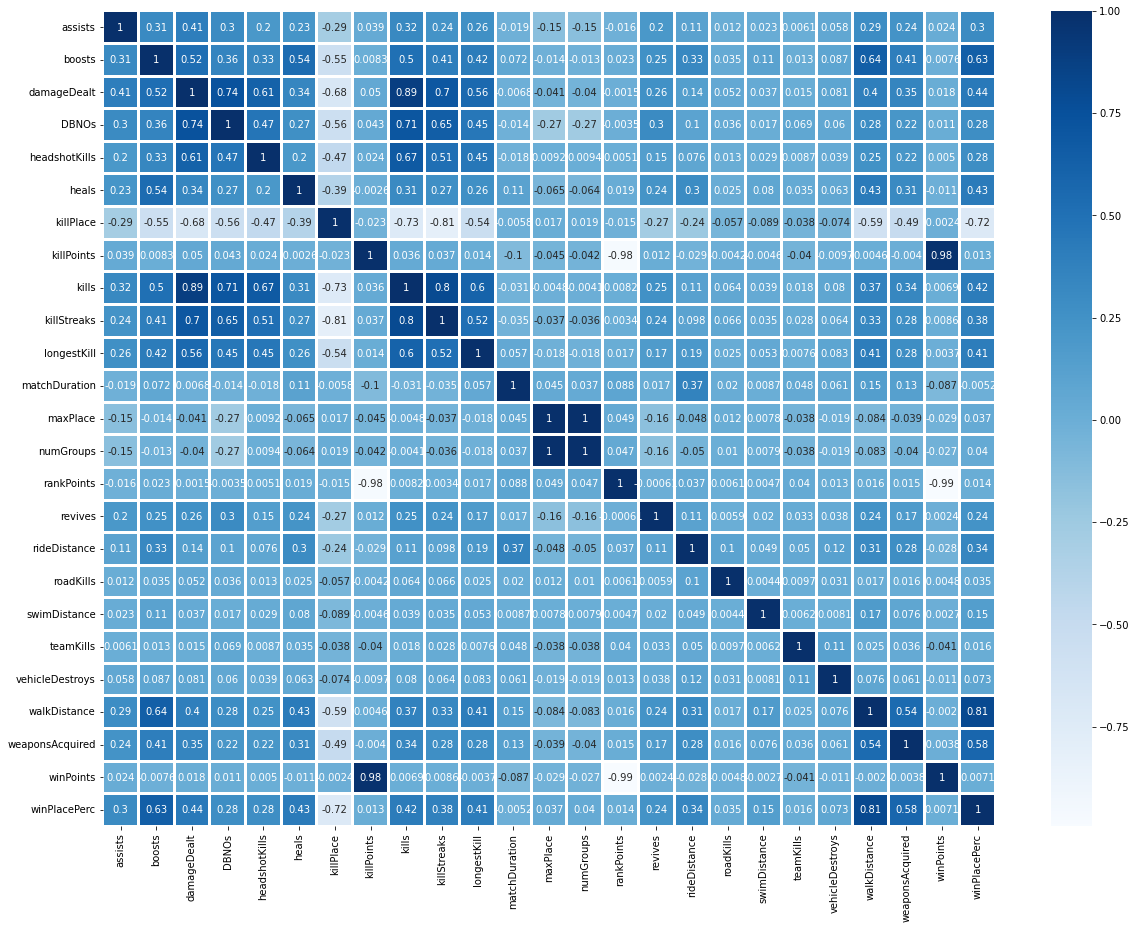

In [ ]:
# Check test_num corr
plt.figure(figsize=(20, 15))
sns.heatmap(data=pubg_num.corr(), annot=True, cmap='Blues', linewidths=2.0)
plt.show()

##### Reveiw heatmap
- 위를 보게 되면 양의 상관관계가 두르러지는 지점이, [kills, killStreaks, longestKill] 끼리의 관계,
    그리고 [kills, damageDealt], [winPoints, killPoints], [walkDistance, winPlacePerc] 등이 보임.
- 음의 상관관계는 [killPoints, rankPoints], [rankPoints, winPoints] 정도로 보인다.

## EDA


##Training
- train-test data split
- model training

#### Data Split

In [ ]:
#test = pd.read_csv('/content/drive/MyDrive/modlingPJ/test_V2.csv')

In [ ]:
#test.isna().sum() # Checked no missing value

In [ ]:
# Need to match the size - Drop objects
test_num = test.drop(['Id', 'groupId', 'matchId', 'matchType'] ,axis=1)
test_num.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,0,0,51.46875,0,0,0,73,0,0,0,0.0000,1884,28,28,1500,0,0.0,0,0.0,0,0,588.0,1,0
1,0,4,179.12500,0,0,2,11,0,2,1,362.0000,1811,48,47,1503,2,4668.0,0,0.0,0,0,2017.0,6,0
2,1,0,23.40625,0,0,4,49,0,0,0,0.0000,1793,28,27,1565,0,0.0,0,0.0,0,0,788.0,4,0
3,0,0,65.50000,0,0,0,54,0,0,0,0.0000,1834,45,44,1465,0,0.0,0,0.0,0,0,1812.0,3,0
4,0,4,330.25000,1,2,1,7,0,3,1,60.0625,1326,28,27,1480,1,0.0,0,0.0,0,0,2964.0,4,0


In [ ]:
#from sklearn.model_selection import train_test_split

#x = pubg_num.drop(columns='winPlacePerc')
#y = pubg_num['winPlacePerc']

#x_train, x_test, y_train, y_test = \
#train_test_split(x, y, test_size=0.2, random_state=100)

#x_train.shape, x_test.shape, y_train.shape, y_test.shape

In [ ]:
# 학습을 위한 training / test dataset 나누기
from sklearn.model_selection import train_test_split

x = pubg_num.drop(columns='winPlacePerc')
y = pubg_num['winPlacePerc']

# 트테트테
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0xC0FFEE)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=0xC0FFEE)

# 6 : 2 : 2 = train : validation : test
print(x_train.shape, x_val.shape, x_test.shape, y_train.shape, y_val.shape, y_test.shape)

(2668179, 24) (889393, 24) (889393, 24) (2668179,) (889393,) (889393,)


In [ ]:
# Feature Engineering
# fix : ValueError: Unknown label type: 'continuous' -> LogisticRegression
# LogisticRegression Recall that a logistic regression model requires 
# the values of the response variable to be categorical such as:
# 0 or 1 / “Yes” or “No” / “Pass” or “Fail”
#from sklearn import preprocessing
#from sklearn import utils

#convert y values to categorical values
#lab = preprocessing.LabelEncoder()
#y_transformed = lab.fit_transform(y_train)

#view transformed values
#print(y_transformed)
# ref : https://www.statology.org/valueerror-unknown-label-type-continuous/

In [ ]:
# Jupyter notebook
# !pip install lightgbm

In [ ]:
# Modeling test
from sklearn.linear_model import LinearRegression   # 1. Linear Regression
from sklearn.linear_model import Lasso              # 2. Lasso
from sklearn.linear_model import Ridge              # 3. Ridge
from xgboost.sklearn import XGBRegressor            # 4. XGBoost
from lightgbm.sklearn import LGBMRegressor          # 5. LightGBM

# S: SVR Package?
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
# E: SVR Package?

from sklearn.metrics import mean_absolute_error # mean_squared_error


In [ ]:
# LinearRegression - for check
linearReg = LinearRegression()
linearReg.fit(x_train, y_train)
x_train.shape, y_train.shape, x_test.shape

((2668179, 24), (2668179,), (889393, 24))

In [ ]:
## training
reg = LinearRegression()
reg2 = Lasso()
reg3 = Ridge()
reg4 = XGBRegressor()
reg5 = LGBMRegressor()

reg.fit(x_train, y_train)
reg2.fit(x_train, y_train)
reg3.fit(x_train, y_train)
reg4.fit(x_train, y_train)
reg5.fit(x_train, y_train)

pred_train = reg.predict(x_train)
pred_train2 = reg2.predict(x_train)
pred_train3 = reg3.predict(x_train)
pred_train4 = reg4.predict(x_train)
pred_train5 = reg5.predict(x_train)

pred_val = reg.predict(x_val)
pred_val2 = reg2.predict(x_val)
pred_val3 = reg3.predict(x_val)
pred_val4 = reg4.predict(x_val)
pred_val5 = reg5.predict(x_val)

mae_train = mean_absolute_error(y_train, pred_train)
mae_val = mean_absolute_error(y_val, pred_val)
mae_train2 = mean_absolute_error(y_train, pred_train2)
mae_val2 = mean_absolute_error(y_val, pred_val2)
mae_train3 = mean_absolute_error(y_train, pred_train3)
mae_val3 = mean_absolute_error(y_val, pred_val3)
mae_train4 = mean_absolute_error(y_train, pred_train4)
mae_val4 = mean_absolute_error(y_val, pred_val4)
mae_train5 = mean_absolute_error(y_train, pred_train5)
mae_val5 = mean_absolute_error(y_val, pred_val5)


print("1. Linear Regression\t, train=%.4f, val=%.4f" % (mae_train, mae_val))
print("2. Lasso\t\t, train=%.4f, val=%.4f" % (mae_train2, mae_val2))
print("3. Ridge\t\t, train=%.4f, val=%.4f" % (mae_train3, mae_val3))
print("4. XGBoost\t\t, train=%.4f, val=%.4f" % (mae_train4, mae_val4))
print("5. LightGBM\t\t, train=%.4f, val=%.4f" % (mae_train5, mae_val5))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.59993e-09): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


[07:36:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1. Linear Regression	, train=0.0927, val=0.0925
2. Lasso		, train=0.1210, val=0.1207
3. Ridge		, train=0.0927, val=0.0925
4. XGBoost		, train=0.0694, val=0.0693
5. LightGBM		, train=0.0603, val=0.0604


In [ ]:
# Hyper-parameter tuning
# 1. Human Search
# 2. Grid Search(GridSearchCV) : 주어진 hp의 조합을 모두 돌려보는 방식.
# 3. Bayesian Optimization(hyperopt, optuna, ...) : hyper-parameter를 최적화하는 베이지안 방식을 사용.

# GridSearchCV
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#    "max_depth" : [3, 4, 5, 6, 7, -1], # 6
#    "learning_rate" : [0.1, 0.01, 0.05], # 3
#    "n_estimators" : [50, 100, 200] # 3
# } # 6x3x3 = 54

# gcv = GridSearchCV(reg5, param_grid, scoring='neg_mean_squared_error', verbose=1)
# gcv.fit(x_train, y_train)
#print(gcv.cv_results_)
# print(gcv.best_estimator_)
# print(gcv.best_params_)

In [ ]:
# test(Prediction)
# training set과 같은 전처리! V
# final_model = gcv.best_estimator_

In [ ]:
# prediction!
result = reg.predict(x_test)
result2 = reg2.predict(x_test)
result3 = reg3.predict(x_test)
result4 = reg4.predict(x_test)
result5 = reg5.predict(x_test)

In [ ]:
# Summary!
print("---------- Linear Regression ---------")
print('MSE in training: %.4f' % mean_absolute_error(y_test, result))

print("---------- Lasso ---------")
print('MSE in training: %.4f' % mean_absolute_error(y_test, result2))

print("---------- Ridge ---------")
print('MSE in training: %.4f' % mean_absolute_error(y_test, result3))

print("---------- XGBoost ---------")
print('MSE in training: %.4f' % mean_absolute_error(y_test, result4))

print("---------- LightGBM ---------")
print('MSE in training: %.4f' % mean_absolute_error(y_test, result5))

---------- Linear Regression ---------
MSE in training: 0.0926
---------- Lasso ---------
MSE in training: 0.1209
---------- Ridge ---------
MSE in training: 0.0926
---------- XGBoost ---------
MSE in training: 0.0694
---------- LightGBM ---------
MSE in training: 0.0603


In [ ]:
# SVR == Epsilon-Support Vector Regression.
#svrmodel = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
#svrmodel = SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='scale', 
#kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
#svrmodel.fit(x_train, y_train)
# Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR(epsilon=0.2))])
# x_train.shape, y_train.shape, x_test.shape
# code ref : https://python.hotexamples.com/examples/sklearn.svm/SVR/score/python-svr-score-method-examples.html

In [ ]:
# get_params(deep=True)
#y_pred_svr = svrmodel.predict(x_test)
#mean_absolute_error(y_test, y_pred_svr)
#svr_score = svrmodel.score(x_test, y_test)

#### Drop some columns and train again
- rankPoints (killPoints사용)
- roadKills (예능용이고, 대부분이 0이라 상관관계 찾기 힘듬)
- matchDuration (대기시간이라 실질적인 플레이타임과는 관계 없음
- teamKills (승자와 관계가 없음)

In [ ]:
# Drop colums train & test
pubg_num = test.drop(['rankPoints', 'roadKills', 'matchDuration', 'teamKills'] ,axis=1)
test_num = test.drop(['rankPoints', 'roadKills', 'matchDuration', 'teamKills'] ,axis=1)
test_num.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchType,maxPlace,numGroups,revives,rideDistance,swimDistance,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,9329eb41e215eb,676b23c24e70d6,45b576ab7daa7f,0,0,51.46875,0,0,0,73,0,0,0,0.0000,squad-fpp,28,28,0,0.0,0.0,0,588.0,1,0
1,639bd0dcd7bda8,430933124148dd,42a9a0b906c928,0,4,179.12500,0,0,2,11,0,2,1,362.0000,duo-fpp,48,47,2,4668.0,0.0,0,2017.0,6,0
2,63d5c8ef8dfe91,0b45f5db20ba99,87e7e4477a048e,1,0,23.40625,0,0,4,49,0,0,0,0.0000,squad-fpp,28,27,0,0.0,0.0,0,788.0,4,0
3,cf5b81422591d1,b7497dbdc77f4a,1b9a94f1af67f1,0,0,65.50000,0,0,0,54,0,0,0,0.0000,duo-fpp,45,44,0,0.0,0.0,0,1812.0,3,0
4,ee6a295187ba21,6604ce20a1d230,40754a93016066,0,4,330.25000,1,2,1,7,0,3,1,60.0625,squad-fpp,28,27,1,0.0,0.0,0,2964.0,4,0


In [ ]:
## training
reg = LinearRegression()
reg2 = Lasso()
reg3 = Ridge()
reg4 = XGBRegressor()
reg5 = LGBMRegressor()

reg.fit(x_train, y_train)
reg2.fit(x_train, y_train)
reg3.fit(x_train, y_train)
reg4.fit(x_train, y_train)
reg5.fit(x_train, y_train)

pred_train = reg.predict(x_train)
pred_train2 = reg2.predict(x_train)
pred_train3 = reg3.predict(x_train)
pred_train4 = reg4.predict(x_train)
pred_train5 = reg5.predict(x_train)

pred_val = reg.predict(x_val)
pred_val2 = reg2.predict(x_val)
pred_val3 = reg3.predict(x_val)
pred_val4 = reg4.predict(x_val)
pred_val5 = reg5.predict(x_val)

mae_train = mean_absolute_error(y_train, pred_train)
mae_val = mean_absolute_error(y_val, pred_val)
mae_train2 = mean_absolute_error(y_train, pred_train2)
mae_val2 = mean_absolute_error(y_val, pred_val2)
mae_train3 = mean_absolute_error(y_train, pred_train3)
mae_val3 = mean_absolute_error(y_val, pred_val3)
mae_train4 = mean_absolute_error(y_train, pred_train4)
mae_val4 = mean_absolute_error(y_val, pred_val4)
mae_train5 = mean_absolute_error(y_train, pred_train5)
mae_val5 = mean_absolute_error(y_val, pred_val5)


print("1. Linear Regression\t, train=%.4f, val=%.4f" % (mae_train, mae_val))
print("2. Lasso\t\t, train=%.4f, val=%.4f" % (mae_train2, mae_val2))
print("3. Ridge\t\t, train=%.4f, val=%.4f" % (mae_train3, mae_val3))
print("4. XGBoost\t\t, train=%.4f, val=%.4f" % (mae_train4, mae_val4))
print("5. LightGBM\t\t, train=%.4f, val=%.4f" % (mae_train5, mae_val5))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.59993e-09): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


[07:46:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1. Linear Regression	, train=0.0927, val=0.0925
2. Lasso		, train=0.1210, val=0.1207
3. Ridge		, train=0.0927, val=0.0925
4. XGBoost		, train=0.0694, val=0.0693
5. LightGBM		, train=0.0603, val=0.0604


In [ ]:
# prediction!
result = reg.predict(x_test)
result2 = reg2.predict(x_test)
result3 = reg3.predict(x_test)
result4 = reg4.predict(x_test)
result5 = reg5.predict(x_test)

In [ ]:
# Summary!
print("---------- Linear Regression ---------")
print('MSE in training: %.4f' % mean_absolute_error(y_test, result))

print("---------- Lasso ---------")
print('MSE in training: %.4f' % mean_absolute_error(y_test, result2))

print("---------- Ridge ---------")
print('MSE in training: %.4f' % mean_absolute_error(y_test, result3))

print("---------- XGBoost ---------")
print('MSE in training: %.4f' % mean_absolute_error(y_test, result4))

print("---------- LightGBM ---------")
print('MSE in training: %.4f' % mean_absolute_error(y_test, result5))

---------- Linear Regression ---------
MSE in training: 0.0926
---------- Lasso ---------
MSE in training: 0.1209
---------- Ridge ---------
MSE in training: 0.0926
---------- XGBoost ---------
MSE in training: 0.0694
---------- LightGBM ---------
MSE in training: 0.0603


In [ ]:
# Before Drop / After Drop => check

** Before drop colums **

---------- Linear Regression ---------

MSE in training: 0.0926

---------- Lasso ---------

MSE in training: 0.1209

---------- Ridge ---------

MSE in training: 0.0926

---------- XGBoost ---------

MSE in training: 0.0694

---------- LightGBM ---------

MSE in training: 0.0603

---

** After drop columns **

---------- Linear Regression ---------

MSE in training: 0.0926

---------- Lasso ---------

MSE in training: 0.1209

---------- Ridge ---------

MSE in training: 0.0926

---------- XGBoost ---------

MSE in training: 0.0694

---------- LightGBM ---------

MSE in training: 0.0603

In [ ]:
# No change checked.